In [1]:
#Business Goal:
#Build a predictive model to identify who would be admitted

In [2]:
import pandas as pd
raw_df=pd.read_excel('admit.xlsx')

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
 4   gender  400 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 15.8+ KB


In [4]:
raw_df.head()

,admit,gre,gpa,rank,gender
0,1,660,3.67,3,Male
1,1,800,4.00,1,Female
2,1,640,3.19,4,Male
3,1,760,3.00,2,Male
4,1,560,2.98,1,Female


In [5]:
raw_df

,admit,gre,gpa,rank,gender
0,1,660,3.67,3,Male
1,1,800,4.00,1,Female
2,1,640,3.19,4,Male
3,1,760,3.00,2,Male
4,1,560,2.98,1,Female
...,...,...,...,...,...
395,0,620,4.00,2,Female
396,0,560,3.04,3,Male
397,0,460,2.63,2,Female
398,0,700,3.65,2,Male


In [6]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.admit.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: admit
Non-Null Count  Dtype   
--------------  -----   
400 non-null    category
dtypes: category(1)
memory usage: 652.0 bytes
None


In [7]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a list called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'admit' )

In [8]:
print(X_features)

['gre', 'gpa', 'rank', 'gender']


In [9]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]


In [10]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 280 entries, 266 to 346
Series name: admit
Non-Null Count  Dtype   
--------------  -----   
280 non-null    category
dtypes: category(1)
memory usage: 2.6 KB
None


In [11]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['gender','rank']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)



In [12]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 266 to 346
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gre          280 non-null    int64  
 1   gpa          280 non-null    float64
 2   gender_Male  280 non-null    int32  
 3   rank_2       280 non-null    int32  
 4   rank_3       280 non-null    int32  
 5   rank_4       280 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 10.9 KB


In [13]:
X_train_encoded.head()

,gre,gpa,gender_Male,rank_2,rank_3,rank_4
266,380,3.59,1,0,0,1
369,400,3.36,0,1,0,0
378,480,2.78,1,0,1,0
359,520,3.15,1,0,1,0
42,700,3.52,1,0,0,1


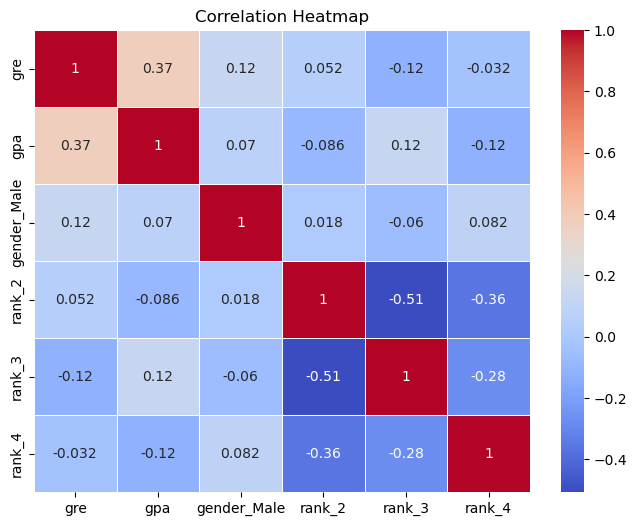

In [14]:
##-----------------------------------------------------------------------
##  2. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
corr_matrix

,gre,gpa,gender_Male,rank_2,rank_3,rank_4
gre,1.000000,0.374043,0.122734,0.051833,-0.116658,-0.031818
gpa,0.374043,1.000000,0.070004,-0.085552,0.124052,-0.115924
gender_Male,0.122734,0.070004,1.000000,0.017627,-0.059966,0.081706
rank_2,0.051833,-0.085552,0.017627,1.000000,-0.507371,-0.362014
rank_3,-0.116658,0.124052,-0.059966,-0.507371,1.000000,-0.275513
rank_4,-0.031818,-0.115924,0.081706,-0.362014,-0.275513,1.000000


In [16]:
##-------------------------
##  Build the logit model
##-------------------------
import statsmodels.api as sm
##  Constant is to be added when using the sm library
X_train_encoded = sm.add_constant( X_train_encoded )
#Call Logistic regression with X and Y variables of the training data
# Model is built with the training data
logit = sm.Logit(y_train, X_train_encoded)
##  Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.559447
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.113     
Dependent Variable: admit            AIC:              327.2904  
Date:               2024-09-24 19:21 BIC:              352.7339  
No. Observations:   280              Log-Likelihood:   -156.65   
Df Model:           6                LL-Null:          -176.56   
Df Residuals:       273              LLR p-value:      4.9082e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -4.4099    1.4602  -3.0200  0.0025  -7.2718  -1.5479
gre            0.0028    0.0013   2.0976  0.0359   0.0002   0.

In [17]:
#Only significant X-vars are used to build the predictive model
#Only significant X-vars are used to build the predictive model
#Select the significant variables
significant_vars = ['gre','gender_Male','rank_3','rank_4']
print(significant_vars)

['gre', 'gender_Male', 'rank_3', 'rank_4']


In [18]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
final_logit_model = sm.Logit( y_train,X_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.595689
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.055     
Dependent Variable: admit            AIC:              341.5860  
Date:               2024-09-24 19:21 BIC:              356.1252  
No. Observations:   280              Log-Likelihood:   -166.79   
Df Model:           3                LL-Null:          -176.56   
Df Residuals:       276              LLR p-value:      0.00021145
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
gre           -0.0010    0.0004  -2.7799  0.0054  -0.0018  -0.0003
gender_Male    0.7541    0.2740   2.7523  0.0059   0.2171   1.

In [19]:
##----------------------------
##  Apply model on test data
##----------------------------
X_test_encoded=sm.add_constant(X_test_encoded)
#Make sure only the significant variables in the test data are selected
X_test_sig_vars=X_test_encoded[significant_vars]
X_test_sig_vars
y_prob=final_logit_model.predict(X_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [20]:
y_prob

288    0.378588
108    0.548985
217    0.340577
70     0.554092
330    0.169099
         ...   
59     0.248544
79     0.301962
293    0.528464
249    0.166217
107    0.289068
Length: 120, dtype: float64

In [21]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})


In [22]:
print(y_pred_df.head())

    actual_Y  predicted_prob
288        0        0.378588
108        1        0.548985
217        0        0.340577
70         1        0.554092
330        0        0.169099


In [23]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

    actual_Y  predicted_prob  predicted_Y
288        0        0.378588            0
108        1        0.548985            1
217        0        0.340577            0
70         1        0.554092            1
330        0        0.169099            0


In [24]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[65 19]
 [24 12]]


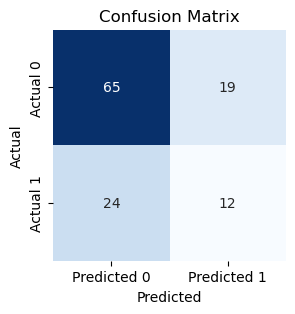

In [25]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.33
Accuracy: 0.64


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        84
           1       0.39      0.33      0.36        36

    accuracy                           0.64       120
   macro avg       0.56      0.55      0.55       120
weighted avg       0.63      0.64      0.63       120



In [28]:
#Implications/ Recommendations


In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).
    
    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """
    
    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)
        
        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
        
        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
        
        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)
    
    # Print the sensitivity table
    print(sensitivity_table)

In [30]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           1.000000
1        0.11           1.000000
2        0.12           1.000000
3        0.13           1.000000
4        0.14           1.000000
5        0.15           0.972222
6        0.16           0.944444
7        0.17           0.944444
8        0.18           0.944444
9        0.19           0.944444
10       0.20           0.916667
11       0.21           0.916667
12       0.22           0.888889
13       0.23           0.861111
14       0.24           0.861111
15       0.25           0.805556
16       0.26           0.805556
17       0.27           0.805556
18       0.28           0.777778
19       0.29           0.722222
20       0.30           0.666667
21       0.31           0.555556
22       0.32           0.527778
23       0.33           0.500000
24       0.34           0.472222
25       0.35           0.444444
26       0.36           0.444444
27       0.37           0.416667
28       0.38           0.416667
29       0